# Data Analysis Notebook

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. **Scrape** reviews from Google Play Store
2. **Preprocess** and clean the data
3. **Visualize** the results

## 1. Run Scraper

This cell runs the scraping script to fetch the latest reviews from the Google Play Store.
The output will show the progress.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add project root to Python path
sys.path.append(os.path.abspath(".."))

try:
    from Scripts.preprocessing import ReviewPreprocessor
    from Scripts.scraper import main as run_scraper
    from Scripts.sentiment_analysis import SentimentAnalysis
    from Scripts.topic_modeling import TopicModeling
    print("✅ Successfully imported modules from Scripts!")
except Exception as e:
    print("❌ Failed to import modules:", e)


c:\Users\Birhanu Matebe\Downloads\KAIM\WebScraper\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to C:\Users\Birhanu
[nltk_data]     Matebe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Successfully imported modules from Scripts!


In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...

Starting Google Play Review Scraper

[1/2] Fetching app info...
App info saved.

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


🔍 Scraping reviews for Commercial Bank of Ethiopia...
Total raw reviews fetched: 8121
✅ Collected 400 meaningful English reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:29<00:59, 29.80s/it]


🔍 Scraping reviews for Dashen Bank...
Total raw reviews fetched: 764
✅ Collected 400 meaningful English reviews for Dashen Bank


Banks:  67%|██████▋   | 2/3 [00:45<00:21, 21.67s/it]


🔍 Scraping reviews for Abyssinia...
Total raw reviews fetched: 1186
✅ Collected 400 meaningful English reviews for Abyssinia


Banks: 100%|██████████| 3/3 [01:10<00:00, 23.57s/it]



Scraping Completed!
Total English reviews collected: 1200


Sample Reviews

Commercial Bank of Ethiopia
------------------------------------------------------------

⭐ Rating: 5
Review: This application is very important and advantage for transfer of money and finance in the coutry and foriegn country....
Date: 2025-11-27 23:08:20

⭐ Rating: 1
Review: why didn't work this app?...
Date: 2025-11-27 22:40:35

⭐ Rating: 5
Review: The app makes our life easier. Thank you CBE!...
Date: 2025-11-27 18:00:06

Dashen Bank
------------------------------------------------------------

⭐ Rating: 5
Review: its fast and easy to communicate to the app and its available all area keep it up.i will make Happy for this application thank you dashen bank for your effort,commitment and dedication. i appricated y...
Date: 2025-11-26 18:02:58

⭐ Rating: 1
Review: What do you care about my phone's settings? Who are you to tell me what to turn off and on? It is my phone after all. This *develoler option* thing 

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_version,source
0,5112423d-e618-44ba-ba49-62677cb76cd6,This application is very important and advanta...,5,2025-11-27 23:08:20,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
1,bcb34681-1dd4-4781-b400-4393bb10b1d9,why didn't work this app?,1,2025-11-27 22:40:35,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,c69f051a-00f8-4144-8423-b7ebcd328d2d,The app makes our life easier. Thank you CBE!,5,2025-11-27 18:00:06,A Google user,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,d2995fb9-63c6-4bfc-8d3c-93a0ee9dba8f,this app very bad,1,2025-11-27 16:28:10,A Google user,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
4,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,A Google user,0,None,CBE,Commercial Bank of Ethiopia,4.4.0,Google Play


## 2. Run Preprocessing Pipeline

Now we clean the scraped data using our `ReviewPreprocessor`.

In [3]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1200 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1198 (99.83%)
  app_version: 217 (18.08%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-05-10 to 2025-11-27

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1200 reviews

Saving processed data...
Data saved to: ../data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1200
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1200

Data retention rate: 100.00%
Data error rate: 0.00%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Abyssinia: 400
  Commercial Bank of Ethiopia: 400
  Dashen Bank: 400

Rating distribution:
  ⭐⭐⭐⭐⭐: 597 (49.8%)
  ⭐⭐⭐⭐: 79 (6.6%)
  ⭐⭐⭐: 76 (6.3%)
  ⭐⭐: 59 (4.9%)
  ⭐: 389 (32.4%)

Date range: 2024-05-10 to 2025-11-27

Text stati

In [4]:
print("df in globals():", 'df' in globals())
print("df type:", type(df))
print("df shape:", df.shape)


df in globals(): True
df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1200, 12)


## 3. Visualizations

Let's explore the cleaned data.

C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_18768\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\Birhanu Matebe\AppData\Local\Temp\ipykernel_18768\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


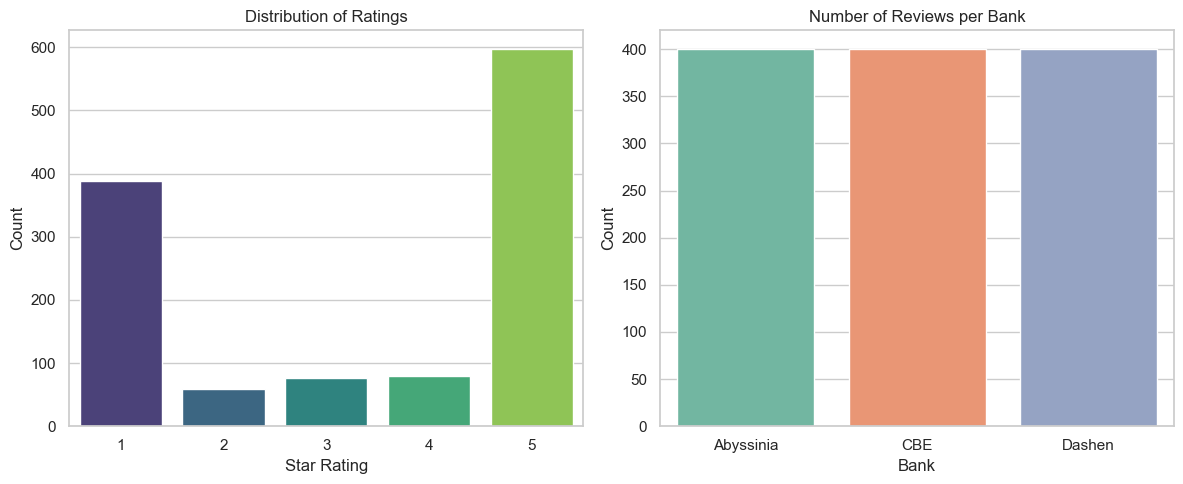

In [5]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

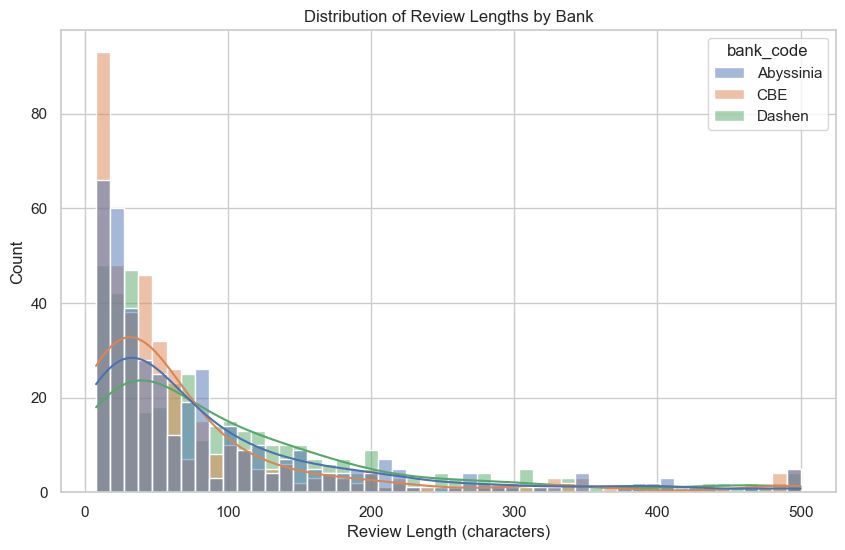

In [6]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()

In [7]:
# Initialize the DistilBERT sentiment analyzer
sa = SentimentAnalysis()


Initializing DistilBERT sentiment pipeline...


Device set to use cpu


In [8]:
# Define a helper function to return both label and score
def get_sentiment(text):
    label, score = sa.analyze(text)
    return pd.Series([label, score])

# Apply to the review_text column
df[['sentiment_label', 'sentiment_score']] = df['review_text'].apply(get_sentiment)


In [9]:
print(df[['review_text', 'sentiment_label', 'sentiment_score']].head())


                                         review_text sentiment_label  \
0                   bad exprience...it is so crushed        NEGATIVE   
1  not user friendly at all it requires a huge co...        NEGATIVE   
2           most of the time is not working properly        NEGATIVE   
3  It keeps notifying me to disable developer opt...        NEGATIVE   
4  the lag is unbelievable when you need it the m...        NEGATIVE   

   sentiment_score  
0         0.999805  
1         0.999757  
2         0.999764  
3         0.996833  
4         0.998317  


In [10]:
df.sample(5)

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score
89,857bb685-6f7e-4db0-af37-eb2f1c1c6fd3,liking this application good,5,2025-05-07,2025,5,Abyssinia,Abyssinia,Abdu berHanu,0,28,Google Play,POSITIVE,0.999831
699,97030984-0e61-4a86-acdc-6da1f4753f04,we would appreciate it if the app can allow to...,4,2025-06-24,2025,6,CBE,Commercial Bank of Ethiopia,A Google user,0,64,Google Play,NEGATIVE,0.917564
219,510eb8c1-9b58-4989-bdd1-674fa63c3d08,The worest app ever,1,2024-10-03,2024,10,Abyssinia,Abyssinia,Sen hit,0,19,Google Play,POSITIVE,0.953590
1072,1e865933-282f-4ea1-98f5-98c08d95a40f,wawwwww what nice super app !!keep it up dashe...,5,2025-04-21,2025,4,Dashen,Dashen Bank,ethio pia,2,55,Google Play,POSITIVE,0.999136
1068,dd0238ce-336d-4dac-832c-8d01f44faf0a,Easy to use and has many options. It is the be...,5,2025-04-21,2025,4,Dashen,Dashen Bank,Dagmawi Tadesse,4,80,Google Play,POSITIVE,0.999755


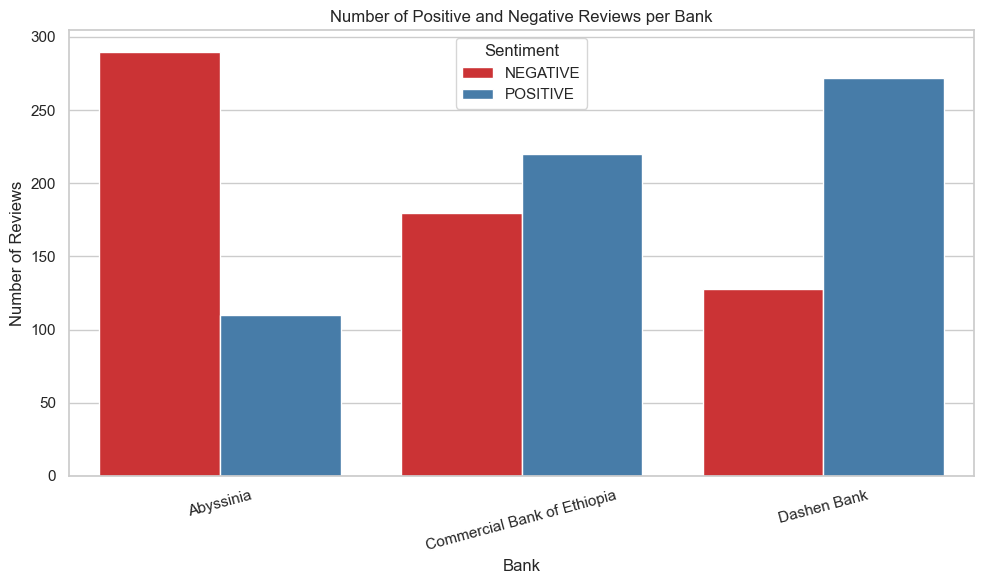

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bank_name', hue='sentiment_label', palette='Set1')

plt.title("Number of Positive and Negative Reviews per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [12]:
# Assuming your df has these columns:
# 'bank_name', 'rating', 'sentiment_score', 'sentiment_label'

# Aggregate mean sentiment score for each bank and rating
agg_df = df.groupby(['bank_name', 'rating'])['sentiment_score'].mean().reset_index()

print(agg_df)


                      bank_name  rating  sentiment_score
0                     Abyssinia       1         0.991427
1                     Abyssinia       2         0.972667
2                     Abyssinia       3         0.981556
3                     Abyssinia       4         0.945294
4                     Abyssinia       5         0.984306
5   Commercial Bank of Ethiopia       1         0.992658
6   Commercial Bank of Ethiopia       2         0.987305
7   Commercial Bank of Ethiopia       3         0.980472
8   Commercial Bank of Ethiopia       4         0.988359
9   Commercial Bank of Ethiopia       5         0.983721
10                  Dashen Bank       1         0.994553
11                  Dashen Bank       2         0.997198
12                  Dashen Bank       3         0.993702
13                  Dashen Bank       4         0.947687
14                  Dashen Bank       5         0.990664


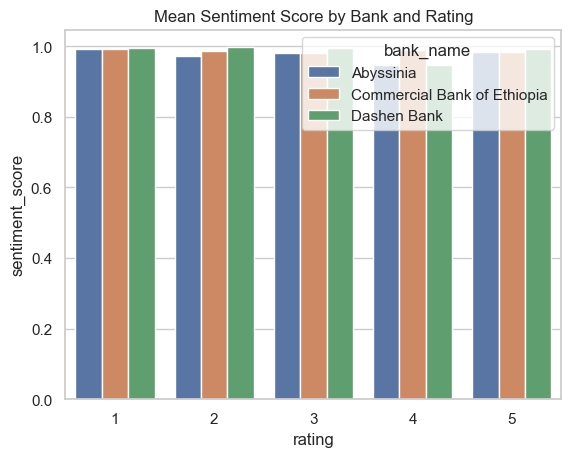

In [13]:


sns.barplot(data=agg_df, x='rating', y='sentiment_score', hue='bank_name')
plt.title("Mean Sentiment Score by Bank and Rating")
plt.show()


In [14]:
top_keywords_per_bank = sa.extract_keywords(df, top_n=40)

# Print results
for bank, tfidf_df in top_keywords_per_bank.items():
    print(f"\n{bank} top {len(tfidf_df)} keywords by TF-IDF:")
    print(tfidf_df.to_string(index=False))


Abyssinia top 40 keywords by TF-IDF:
                word    tfidf
           worst app 8.050656
            good app 6.705879
          doesn work 6.560564
      mobile banking 6.111544
         banking app 6.091549
          worest app 3.099512
  mobile banking app 3.057044
   developer options 2.985971
    good application 2.771896
    developer option 2.755708
worst mobile banking 2.729050
        worst mobile 2.729050
             use app 2.671008
            best app 2.629050
           app doesn 2.546882
         useless app 2.467738
            poor app 2.251070
           great boa 2.099174
            open app 2.066670
   disable developer 2.012579
           great app 1.988574
          mobile app 1.794582
            nice app 1.766286
           best best 1.763559
         app crashes 1.703000
         app working 1.621365
       bank ethiopia 1.611324
           best bank 1.579624
            app slow 1.563211
            easy use 1.513153
      developer mode 1.487976
  

In [15]:
df.sample(5)

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score
1127,43c462b0-3873-429a-ac91-ee72fbf4e070,I have been using the Dashen Supper app mobile...,5,2025-04-21,2025,4,Dashen,Dashen Bank,Kibru Awonchifew,99,380,Google Play,NEGATIVE,0.859239
318,0c83e05b-6fa5-425f-9f09-a30947722360,It is not fast,3,2024-07-11,2024,7,Abyssinia,Abyssinia,Shay Shi,0,14,Google Play,NEGATIVE,0.997207
698,872cc8d6-1441-48ee-9d86-1c256c5dba8a,for no reason my money is gone because the sys...,1,2025-06-25,2025,6,CBE,Commercial Bank of Ethiopia,A Google user,0,187,Google Play,NEGATIVE,0.999703
1180,971db897-312b-4560-998a-aaf867c9aba0,it's very disappointing fix it as soon as poss...,1,2025-04-04,2025,4,Dashen,Dashen Bank,Bini Kassa,4,87,Google Play,NEGATIVE,0.999362
472,8382e883-613c-4404-85ca-4d5179345d19,it's good,5,2025-10-09,2025,10,CBE,Commercial Bank of Ethiopia,A Google user,0,9,Google Play,POSITIVE,0.999836


In [16]:
tm = TopicModeling(num_topics=5)

In [17]:
df = tm.preprocess(df) 

In [18]:
tm.fit_lda(df)

In [19]:
# Get LDA topics
topics = tm.get_topics()
print(topics)

{'Topic_0': [('app', 0.04591577127575874), ('one', 0.01183320488780737), ('bank', 0.009412869811058044), ('banking', 0.00629188260063529), ('worst', 0.005915317218750715), ('dashen', 0.005842754151672125), ('like', 0.005649122409522533), ('work', 0.0054143453016877174), ('thank', 0.005400190129876137), ('great', 0.00536007946357131)], 'Topic_1': [('app', 0.05081009492278099), ('best', 0.03258674964308739), ('banking', 0.02664940431714058), ('mobile', 0.019412873312830925), ('app.', 0.013232076540589333), ('bank', 0.012742220424115658), ('application', 0.010751587338745594), ('use', 0.009333795867860317), ('nice', 0.008921672590076923), ('working', 0.008627752773463726)], 'Topic_2': [('app', 0.02243518829345703), ('super', 0.012673348188400269), ('dashen', 0.009730974212288857), ('amazing', 0.008408910594880581), ('banking', 0.008181499317288399), ('everything', 0.007185833994299173), ('need', 0.006531677208840847), ('experience', 0.006484766490757465), ('app.', 0.005934777203947306), (

In [20]:
# Assign LDA topics to reviews
df = tm.assign_review_topics(df)


In [21]:

# Assign the 5 themes to reviews
df = tm.assign_themes(df)

In [22]:
df.sample(5)

,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source,sentiment_label,sentiment_score,clean_text,tokens,tokens_nostop,topic_id,theme
83,76089146-b1c7-47f4-ab9f-44b6a1092225,the app crush frequently,1,2025-05-24,2025,5,Abyssinia,Abyssinia,Tewodros Regasa,0,24,Google Play,NEGATIVE,0.998525,the app crush frequently,"[the, app, crush, frequently]","[app, crush, frequently]",0,Other
858,211b2b4d-826d-4192-9fa8-25d7e38c7666,Dashen superapp just keeps improving. The new ...,5,2025-10-28,2025,10,Dashen,Dashen Bank,Hermela Asnake,0,134,Google Play,POSITIVE,0.999776,dashen superapp just keeps improving. the new ...,"[dashen, superapp, just, keeps, improving., th...","[dashen, superapp, keeps, improving., new, the...",2,Feature Requests / General Satisfaction
522,0223c3f1-12d3-4d3d-b2ea-cd980d15ab92,All ways Trusted.,5,2025-09-11,2025,9,CBE,Commercial Bank of Ethiopia,A Google user,0,17,Google Play,POSITIVE,0.998872,all ways trusted.,"[all, ways, trusted.]","[ways, trusted.]",0,Other
383,663df513-c514-48fe-9c8f-4d9b244a7bef,Be careful of using this app to transfer large...,1,2024-05-15,2024,5,Abyssinia,Abyssinia,Nebyu Amaha,3,373,Google Play,NEGATIVE,0.990300,be careful of using this app to transfer large...,"[be, careful, of, using, this, app, to, transf...","[careful, using, app, transfer, large, sums, m...",3,Account Access Issues
106,1197ad29-5063-4999-888c-589582754caa,after activated the application it not allowed...,1,2025-03-31,2025,3,Abyssinia,Abyssinia,Hone Boy,0,104,Google Play,NEGATIVE,0.997375,after activated the application it not allowed...,"[after, activated, the, application, it, not, ...","[activated, application, allowed, sign, ,, aut...",2,Other


In [23]:
final_cols = [
    "review_id",
    "review_text",
    "rating",
    "review_date",
    "bank_code",
    "bank_name",
    "user_name",
    "thumbs_up",
    "text_length",
    "source",
    "sentiment_label",
    "sentiment_score",
    "theme"
]

final_df = df[final_cols]


In [24]:
# Group by bank, theme, sentiment
theme_sentiment_counts = (
    final_df
    .groupby(['bank_name', 'theme', 'sentiment_label'])
    .size()
    .reset_index(name='count')
)

theme_sentiment_counts.sample(5)


,bank_name,theme,sentiment_label,count
29,Dashen Bank,Feature Requests / General Satisfaction,POSITIVE,67
15,Commercial Bank of Ethiopia,Customer Support,POSITIVE,12
25,Dashen Bank,Account Access Issues,POSITIVE,23
35,Dashen Bank,User Interface & Experience,POSITIVE,89
31,Dashen Bank,Other,POSITIVE,53


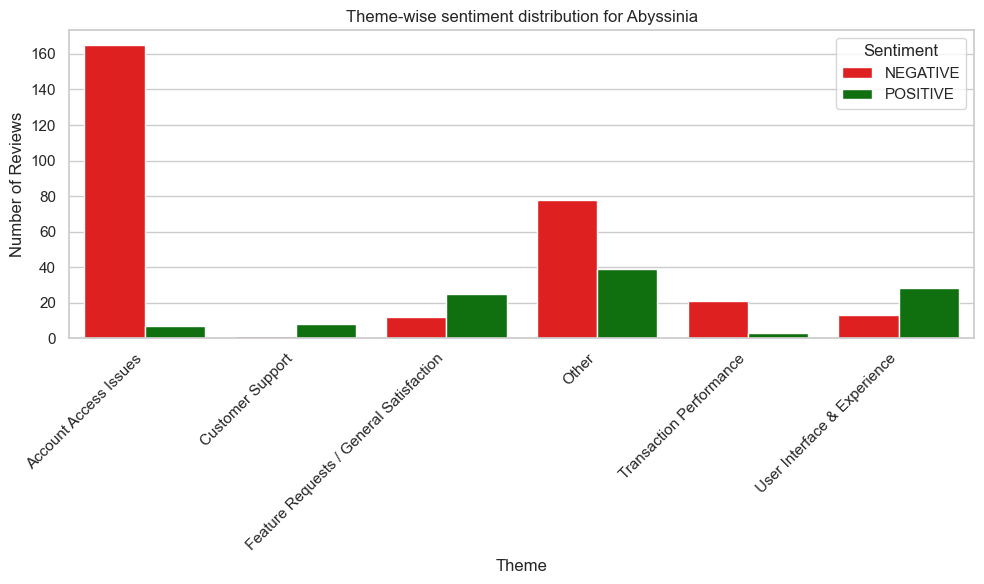

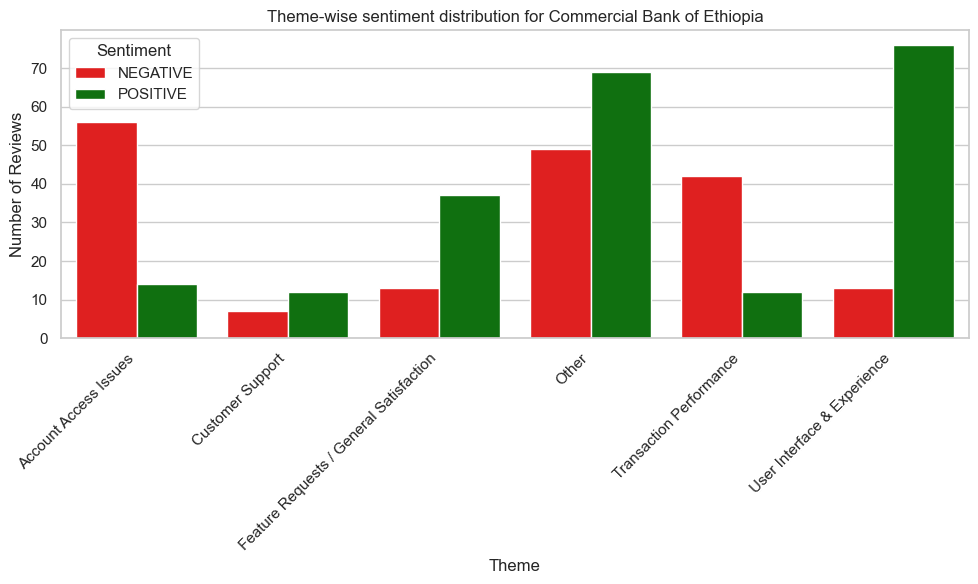

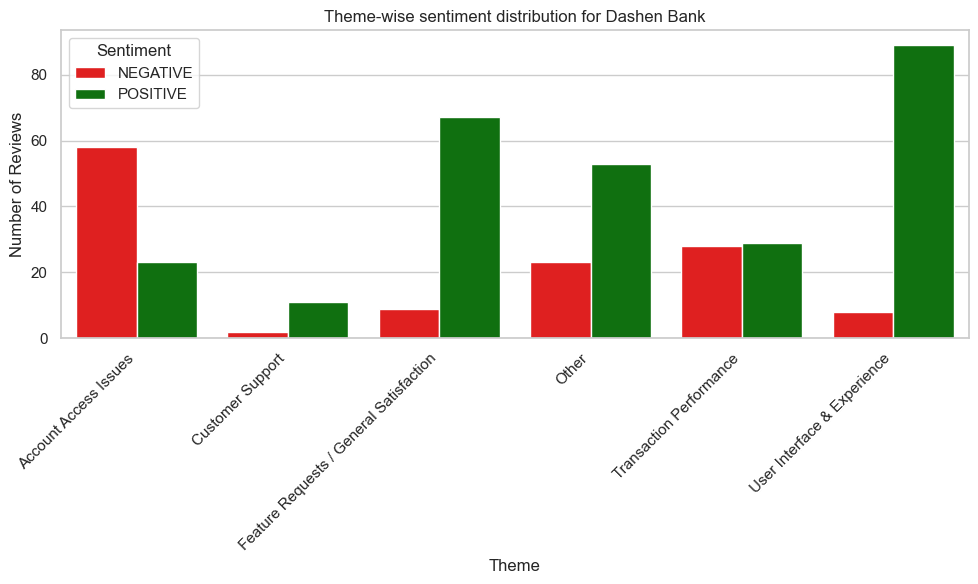

In [25]:
# Plot for each bank separately
for bank in final_df['bank_name'].unique():
    plt.figure(figsize=(10, 6))
    bank_data = theme_sentiment_counts[theme_sentiment_counts['bank_name'] == bank]
    
    sns.barplot(
        data=bank_data,
        x='theme',
        y='count',
        hue='sentiment_label',
        palette={'POSITIVE': 'green', 'NEGATIVE': 'red'}
    )
    
    plt.title(f"Theme-wise sentiment distribution for {bank}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Number of Reviews")
    plt.xlabel("Theme")
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()

In [27]:
final_df.to_csv("../data/final_reviews_analysis.csv", index=False)
print("✅ Final CSV saved with sentiment and themes")


✅ Final CSV saved with sentiment and themes
